In [4]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [5]:
df=pd.DataFrame()

In [6]:
df["X1"]=[1,2,3,4,5,6,6,7,9,9]
df["X2"]=[5,3,6,8,1,9,5,8,9,2]
df["label"]=[1,1,0,1,0,1,0,1,0,0]

In [7]:
import seaborn as sns

<Axes: xlabel='X1', ylabel='X2'>

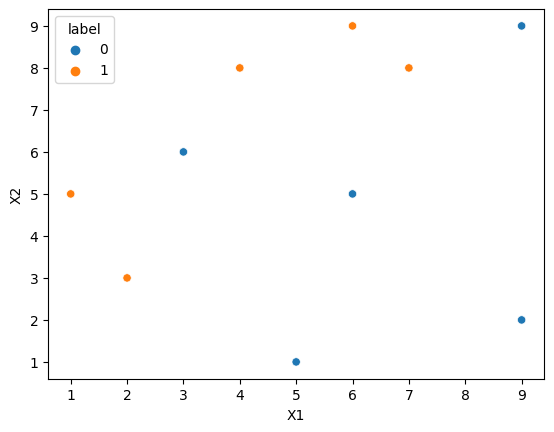

In [8]:
sns.scatterplot(df,x="X1",y="X2",hue="label")

In [9]:
df.shape

(10, 3)

In [10]:
df.shape[0]

10

In [11]:
df["Sample_weight"]=1/(df.shape[0])

In [12]:
df

,X1,X2,label,Sample_weight
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
DT1=DecisionTreeClassifier(max_depth=1)

In [15]:
X=df.iloc[:,:2]
y=df.iloc[:,-2]

In [16]:
y

0    1
1    1
2    0
3    1
4    0
5    1
6    0
7    1
8    0
9    0
Name: label, dtype: int64

In [17]:
X

,X1,X2
0,1,5
1,2,3
2,3,6
3,4,8
4,5,1
5,6,9
6,6,5
7,7,8
8,9,9
9,9,2


In [19]:
DT1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

In [20]:
from sklearn.tree import plot_tree

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

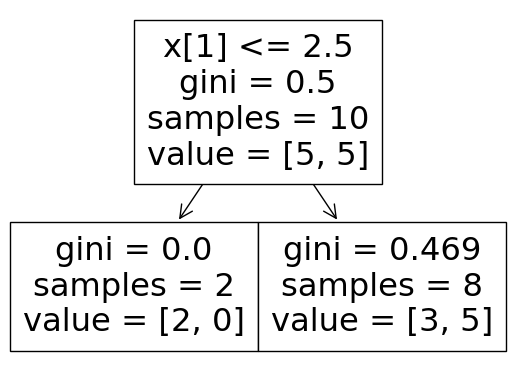

In [21]:
plot_tree(DT1)

c:\Users\madhu\anaconda3\envs\debu\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

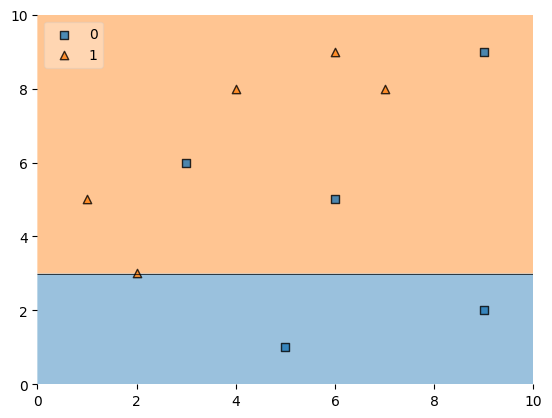

In [22]:
plot_decision_regions(np.array(X),np.array(y),clf=DT1,legend=2)

In [23]:
df["y_pred"]=DT1.predict(X)

In [24]:
df

,X1,X2,label,Sample_weight,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [25]:
# performance of the stump
def calculate_model_weight(error):
    return 0.5*np.log((1-error)/(error))

In [26]:
alpha1=calculate_model_weight(0.3)

In [27]:
alpha1

0.42364893019360184

In [30]:
def update_weight(row,alpha=0.423):
    if row["label"]==row["y_pred"]:
        return row["Sample_weight"]*np.exp(-alpha)
    else:
        return row["Sample_weight"]*np.exp(alpha)

In [31]:
df["update_weigths"]=df.apply(update_weight,axis=1)

In [32]:
df

,X1,X2,label,Sample_weight,y_pred,update_weigths
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [33]:
df['Sample_weight'].sum()

1.0

In [36]:
df["update_weigths"].sum()

0.9165153319682015

In [37]:
df["normalized_weights"]=df["update_weigths"]/df["update_weigths"].sum()

In [38]:
df

,X1,X2,label,Sample_weight,y_pred,update_weigths,normalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [39]:
df["normalized_weights"].sum()

1.0

In [43]:
df["cumsum_upper"]=np.cumsum(df["normalized_weights"])
df["cumsum_lower"]=df["cumsum_upper"]-df["normalized_weights"]

In [45]:
df[["X1","X2","label","y_pred","Sample_weight","update_weigths","cumsum_lower","cumsum_upper"]]

,X1,X2,label,y_pred,Sample_weight,update_weigths,cumsum_lower,cumsum_upper
0,1,5,1,1,0.1,0.065508,0.000000,0.071475
1,2,3,1,1,0.1,0.065508,0.071475,0.142950
2,3,6,0,1,0.1,0.152653,0.142950,0.309508
3,4,8,1,1,0.1,0.065508,0.309508,0.380983
4,5,1,0,0,0.1,0.065508,0.380983,0.452458
5,6,9,1,1,0.1,0.065508,0.452458,0.523933
6,6,5,0,1,0.1,0.152653,0.523933,0.690492
7,7,8,1,1,0.1,0.065508,0.690492,0.761967
8,9,9,0,1,0.1,0.152653,0.761967,0.928525
9,9,2,0,0,0.1,0.065508,0.928525,1.000000


In [46]:
indexes=[]

for i in range(df.shape[0]):
    a=np.random.random()
    for index,row in df.iterrows():
        if row["cumsum_upper"]>a and row["cumsum_lower"]<a:
            indexes.append(index)

In [47]:
indexes

[5, 9, 6, 6, 5, 7, 1, 6, 8, 9]

In [49]:
second_df=df.iloc[indexes]

In [50]:
second_df

,X1,X2,label,Sample_weight,y_pred,update_weigths,normalized_weights,cumsum_upper,cumsum_lower
5,6,9,1,0.1,1,0.065508,0.071475,0.523933,0.452458
9,9,2,0,0.1,0,0.065508,0.071475,1.000000,0.928525
6,6,5,0,0.1,1,0.152653,0.166559,0.690492,0.523933
6,6,5,0,0.1,1,0.152653,0.166559,0.690492,0.523933
5,6,9,1,0.1,1,0.065508,0.071475,0.523933,0.452458
7,7,8,1,0.1,1,0.065508,0.071475,0.761967,0.690492
1,2,3,1,0.1,1,0.065508,0.071475,0.142950,0.071475
6,6,5,0,0.1,1,0.152653,0.166559,0.690492,0.523933
8,9,9,0,0.1,1,0.152653,0.166559,0.928525,0.761967
9,9,2,0,0.1,0,0.065508,0.071475,1.000000,0.928525
